In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path = './Data/Merged Data/Modified'

In [5]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Construction_mod.csv")

In [7]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1566 non-null   object 
 1   Symbol              1566 non-null   object 
 2   Series              1566 non-null   object 
 3   Prev Close          1566 non-null   float64
 4   Open                1566 non-null   float64
 5   High                1566 non-null   float64
 6   Low                 1566 non-null   float64
 7   Last                1566 non-null   float64
 8   Close               1566 non-null   float64
 9   VWAP                1566 non-null   float64
 10  Volume              1566 non-null   int64  
 11  Turnover            1566 non-null   float64
 12  Trades              1566 non-null   int64  
 13  Deliverable Volume  1566 non-null   int64  
 14  %Deliverble         1566 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 183.6+

In [9]:
# Summary statistics of the dataset
print(sector_data.describe())

        Prev Close         Open         High          Low         Last  \
count  1566.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean   1355.481386  1357.418008  1371.978352  1340.718646  1355.479853   
std     229.329410   229.094001   230.457764   227.817699   229.275050   
min     707.900000   697.200000   755.750000   661.000000   710.000000   
25%    1237.450000  1236.925000  1253.225000  1220.425000  1237.387500   
50%    1356.975000  1357.650000  1369.925000  1344.075000  1356.900000   
75%    1491.825000  1492.487500  1506.937500  1476.337500  1490.575000   
max    1876.400000  1876.400000  1893.800000  1864.050000  1879.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  1566.000000  1566.000000  1.566000e+03  1.566000e+03    1566.000000   
mean   1355.382918  1356.437759  2.759095e+06  3.529538e+14   92309.431034   
std     229.302719   229.209695  2.111911e+06  2.389422e+14   52908.237118   
min     707.900000   

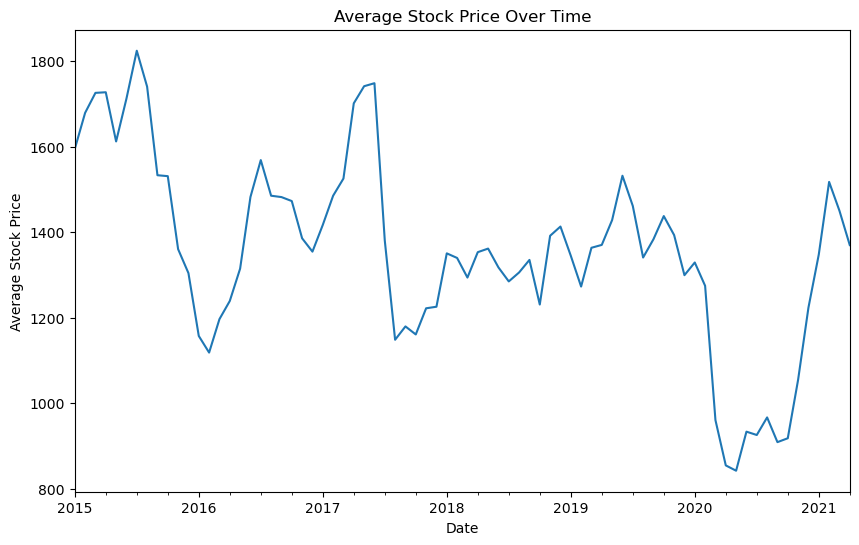

In [11]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

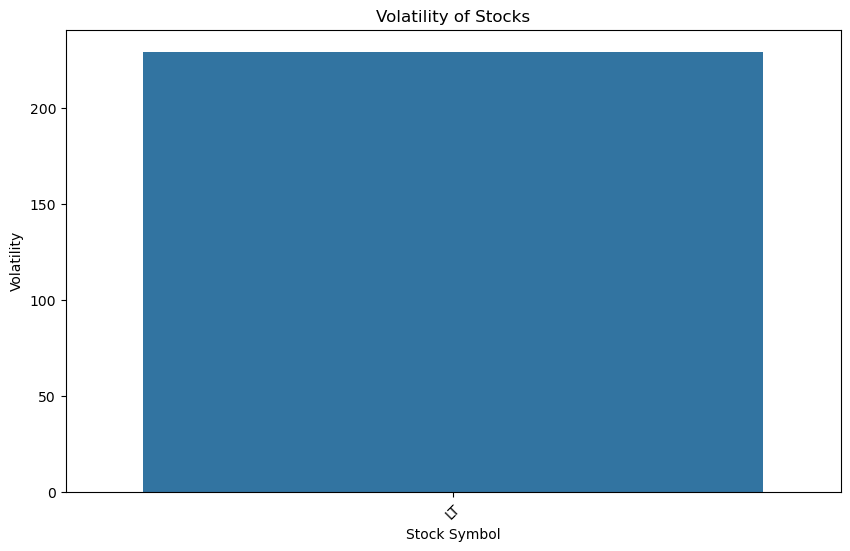

In [13]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

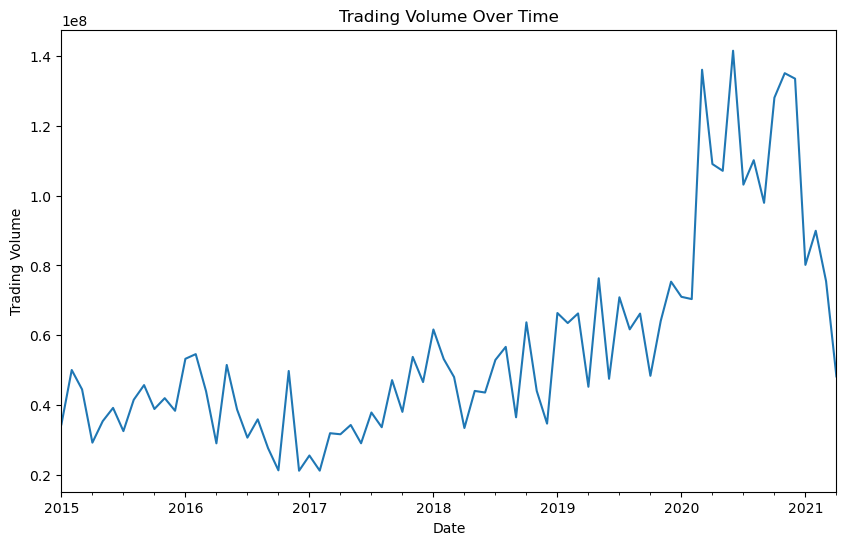

In [15]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()

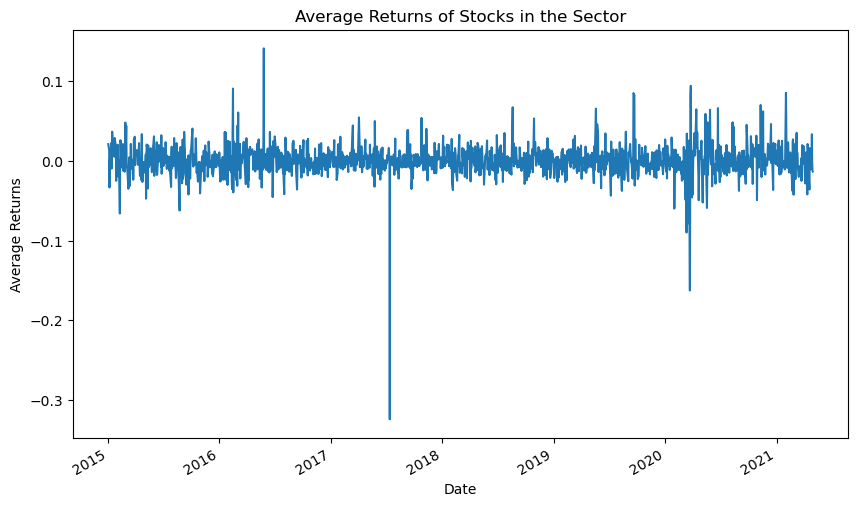

In [17]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()

In [19]:
sector_data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return
Date,,,,,,,,,,,,,,,
2015-01-01,LT,EQ,1494.65,1493.80,1506.90,1492.00,1503.95,1502.95,1500.79,449532,6.746545e+13,15240,161587,0.3595,NaN
2015-01-02,LT,EQ,1502.95,1501.50,1539.00,1501.50,1537.00,1534.65,1526.59,1291056,1.970914e+14,56559,556195,0.4308,0.021092
2015-01-05,LT,EQ,1534.65,1545.35,1571.00,1545.35,1559.00,1556.00,1561.25,1451018,2.265399e+14,52706,483012,0.3329,0.013912
2015-01-06,LT,EQ,1556.00,1541.00,1544.75,1496.05,1498.00,1504.10,1518.64,2032017,3.085904e+14,68691,1097223,0.5400,-0.033355
2015-01-07,LT,EQ,1504.10,1498.75,1510.00,1485.55,1507.80,1500.50,1499.27,1375757,2.062625e+14,71474,589837,0.4287,-0.002393


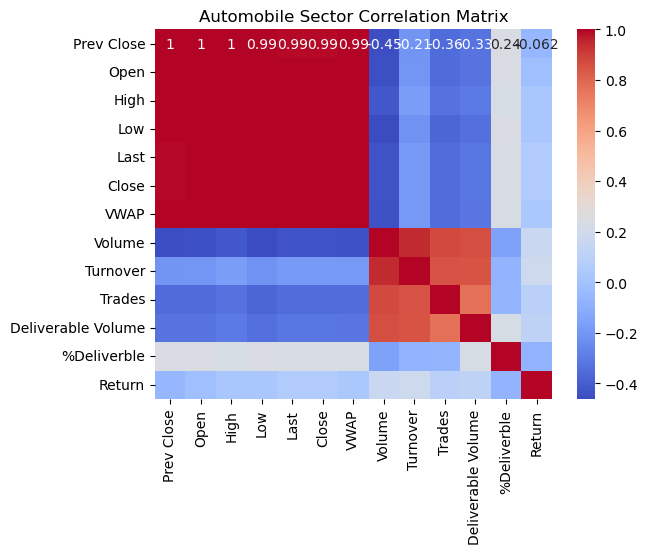

In [21]:
# Visualize the correlation matrix
sector_correlation = sector_data.drop(['Symbol','Series'], axis = 1).corr()
sns.heatmap(sector_correlation, annot=True, cmap='coolwarm')
plt.title('Automobile Sector Correlation Matrix')
plt.show()

From the above correlation heatmap, we can observe the columns 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', and 'VWAP' are highly correlated which introduces Multi-collinearity.

Defining another feature, Relative Strength Index(RSI) which indicates overbought or oversold conditions for each stock in the sector,

In [25]:
def rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [27]:
# Assuming 'data' is a DataFrame with columns: Date, Open, High, Low, Close, Volume
sector_data['RSI'] = rsi(sector_data, window=14)

In [29]:
sector_data.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return,RSI
Date,,,,,,,,,,,,,,,,
2015-01-01,LT,EQ,1494.65,1493.80,1506.90,1492.00,1503.95,1502.95,1500.79,449532,6.746545e+13,15240,161587,0.3595,NaN,NaN
2015-01-02,LT,EQ,1502.95,1501.50,1539.00,1501.50,1537.00,1534.65,1526.59,1291056,1.970914e+14,56559,556195,0.4308,0.021092,NaN
2015-01-05,LT,EQ,1534.65,1545.35,1571.00,1545.35,1559.00,1556.00,1561.25,1451018,2.265399e+14,52706,483012,0.3329,0.013912,NaN
2015-01-06,LT,EQ,1556.00,1541.00,1544.75,1496.05,1498.00,1504.10,1518.64,2032017,3.085904e+14,68691,1097223,0.5400,-0.033355,NaN
2015-01-07,LT,EQ,1504.10,1498.75,1510.00,1485.55,1507.80,1500.50,1499.27,1375757,2.062625e+14,71474,589837,0.4287,-0.002393,NaN


In [31]:
sector_data.fillna(method='bfill', inplace=True)
sector_data.head(5)

/tmp/ipykernel_70016/4260664688.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sector_data.fillna(method='bfill', inplace=True)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return,RSI
Date,,,,,,,,,,,,,,,,
2015-01-01,LT,EQ,1494.65,1493.80,1506.90,1492.00,1503.95,1502.95,1500.79,449532,6.746545e+13,15240,161587,0.3595,0.021092,71.857735
2015-01-02,LT,EQ,1502.95,1501.50,1539.00,1501.50,1537.00,1534.65,1526.59,1291056,1.970914e+14,56559,556195,0.4308,0.021092,71.857735
2015-01-05,LT,EQ,1534.65,1545.35,1571.00,1545.35,1559.00,1556.00,1561.25,1451018,2.265399e+14,52706,483012,0.3329,0.013912,71.857735
2015-01-06,LT,EQ,1556.00,1541.00,1544.75,1496.05,1498.00,1504.10,1518.64,2032017,3.085904e+14,68691,1097223,0.5400,-0.033355,71.857735
2015-01-07,LT,EQ,1504.10,1498.75,1510.00,1485.55,1507.80,1500.50,1499.27,1375757,2.062625e+14,71474,589837,0.4287,-0.002393,71.857735


Any stock with RSI over 70 indicates that it has been overbought and a price correction is incoming while and RSI less than 30 indicates that the stock has been oversold and a bounce back of the stock price is expected.

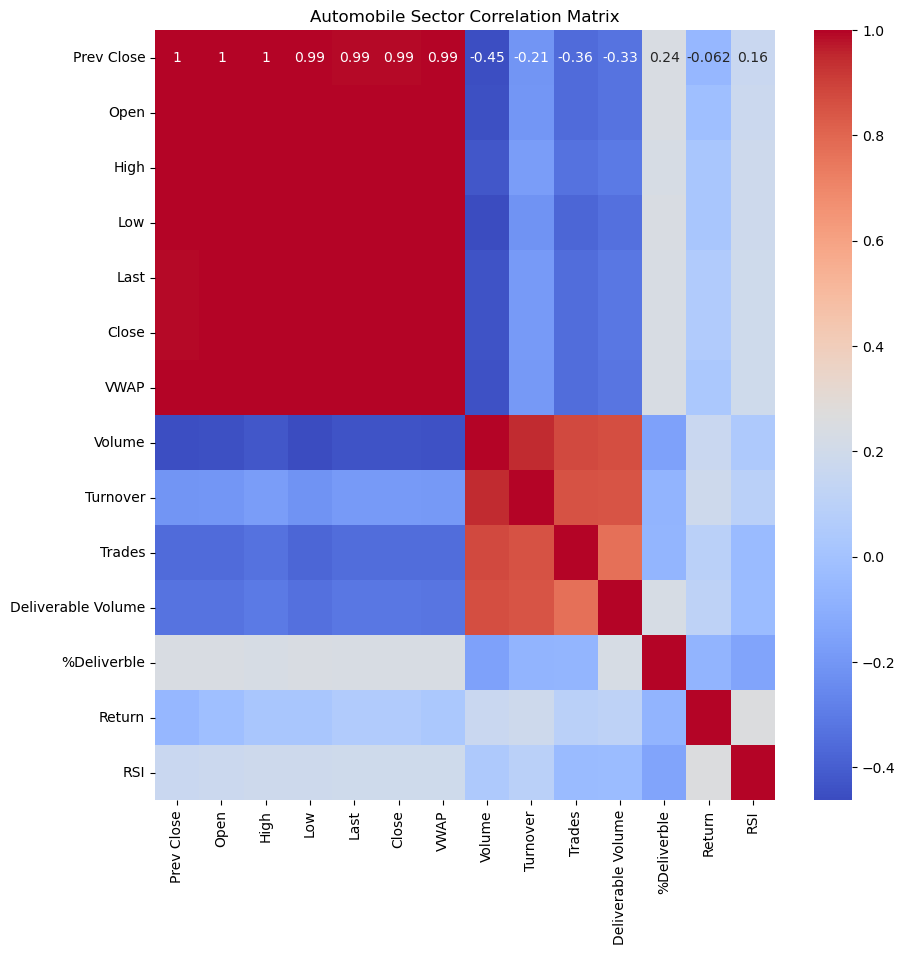

In [34]:
# Visualize the correlation matrix
plt.figure(figsize=(10,10))
sector_correlation = sector_data.drop(['Symbol','Series'], axis = 1).corr()
sns.heatmap(sector_correlation, annot=True, cmap='coolwarm')
plt.title('Automobile Sector Correlation Matrix')
plt.show()

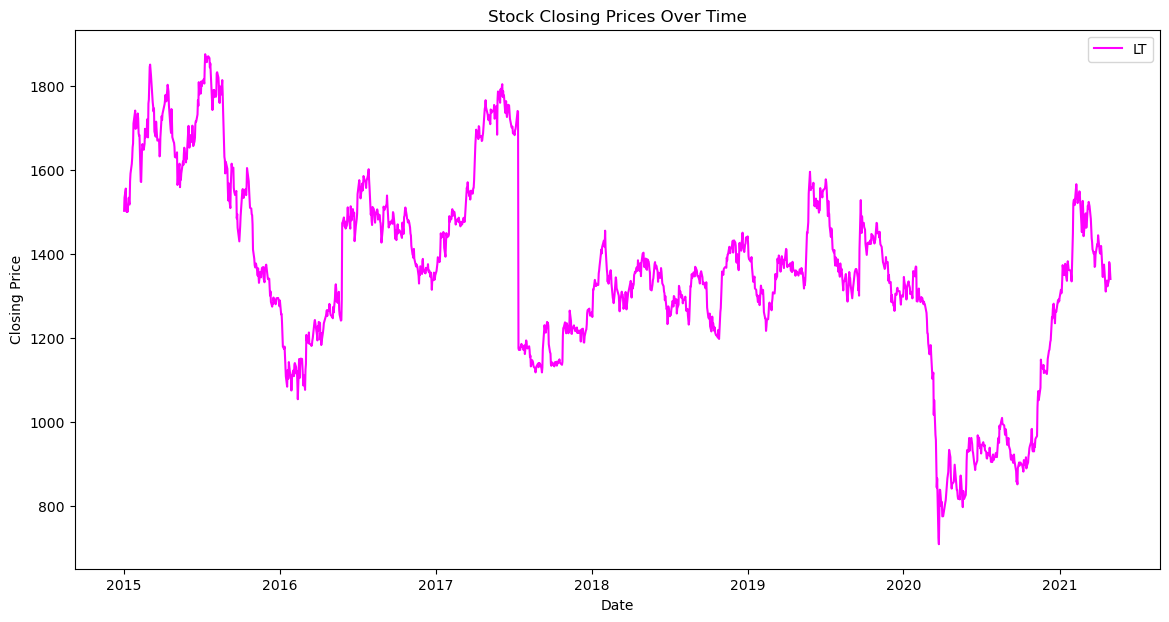

In [38]:
# Load the dataset
df = pd.read_csv('./Data/Merged Data/Modified/Construction_mod.csv', parse_dates=['Date'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Filter the DataFrame for each stock and plot
stocks = ['LT']
colors = ['magenta']  # Assign a color to each stock

plt.figure(figsize=(14, 7))

for stock, color in zip(stocks, colors):
    stock_df = df[df['Symbol'] == stock]
    plt.plot(stock_df.index, stock_df['Close'], label=stock, color=color)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

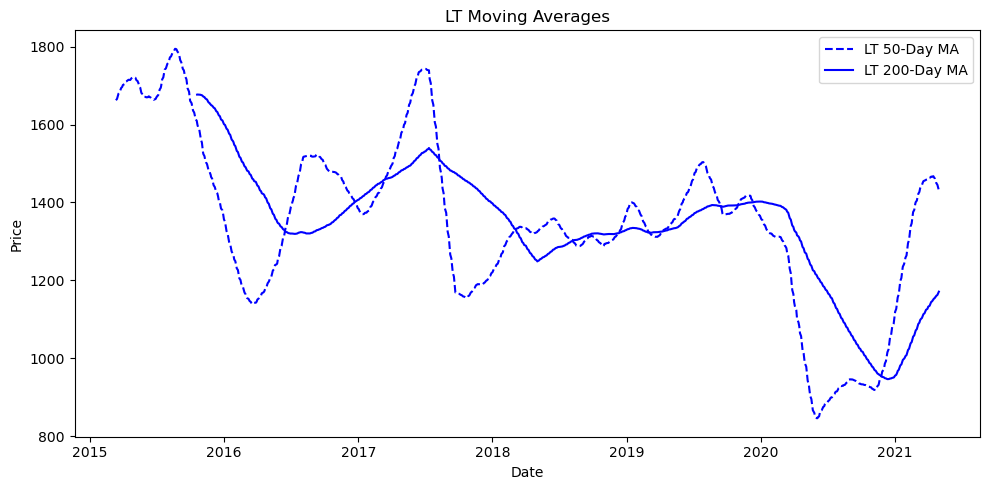

In [42]:
# Get unique stock symbols
unique_symbols = df['Symbol'].unique()

# Colors for each stock
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
color_map = dict(zip(unique_symbols, colors))

# Plotting
fig, axs = plt.subplots(len(unique_symbols), 1, figsize=(10, 5 * len(unique_symbols)))

for i, symbol in enumerate(unique_symbols):
    stock_df = df[df['Symbol'] == symbol].copy()
    
    # Calculate moving averages
    stock_df['50_MA'] = stock_df['Close'].rolling(window=50).mean()
    stock_df['200_MA'] = stock_df['Close'].rolling(window=200).mean()
    
    # Plot
    axs.plot(stock_df.index, stock_df['50_MA'], label=f'{symbol} 50-Day MA', color=color_map[symbol], linestyle='--')
    axs.plot(stock_df.index, stock_df['200_MA'], label=f'{symbol} 200-Day MA', color=color_map[symbol], linestyle='-')
    axs.set_title(f'{symbol} Moving Averages')
    axs.set_xlabel('Date')
    axs.set_ylabel('Price')
    axs.legend()

plt.tight_layout()
plt.show()

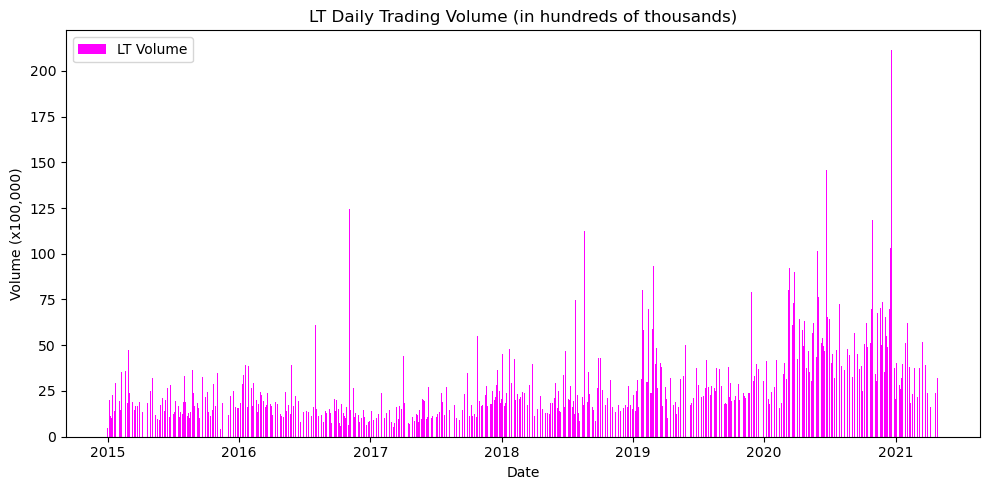

In [44]:
# Convert 'Volume' from 1e6 to 1e8 to a scale of 100,000
df['Volume'] = df['Volume'] / 100000

# Plotting the daily trading volume for each stock in separate charts with unique colors for each stock
unique_symbols = df['Symbol'].unique()
colors = ['magenta']
color_map = dict(zip(unique_symbols, colors))

# Plotting
fig, axs = plt.subplots(len(unique_symbols), 1, figsize=(10, 5 * len(unique_symbols)), sharex=True)

for i, symbol in enumerate(unique_symbols):
    stock_df = df[df['Symbol'] == symbol].copy()
    axs.bar(stock_df.index, stock_df['Volume'], label=f'{symbol} Volume', color=color_map[symbol])
    axs.set_title(f'{symbol} Daily Trading Volume (in hundreds of thousands)')
    axs.set_ylabel('Volume (x100,000)')
    axs.legend()

# Set common labels
plt.xlabel('Date')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

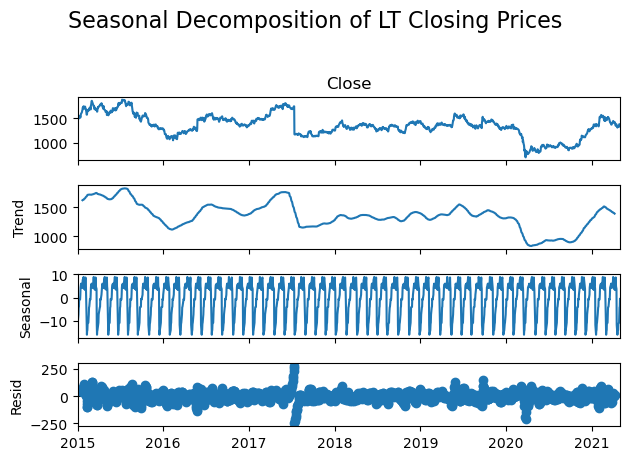

In [46]:
# Plotting seasonal decomposition for each stock
from statsmodels.tsa.seasonal import seasonal_decompose

for stock in unique_symbols:
    # Filter the DataFrame for the current stock
    stock_df = df[df['Symbol'] == stock].copy()
    
    # Ensure the DataFrame is sorted by date
    stock_df = stock_df.sort_index()
    
    # We'll use 'Close' price for decomposition
    # Note: The frequency (period) is an important parameter that might need adjustment
    # based on the stock and the available data points. Here, a generic weekly frequency (7) is used.
    result = seasonal_decompose(stock_df['Close'], model='additive', period=30)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    result.plot()
    plt.suptitle(f'Seasonal Decomposition of {stock} Closing Prices', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
    plt.show()

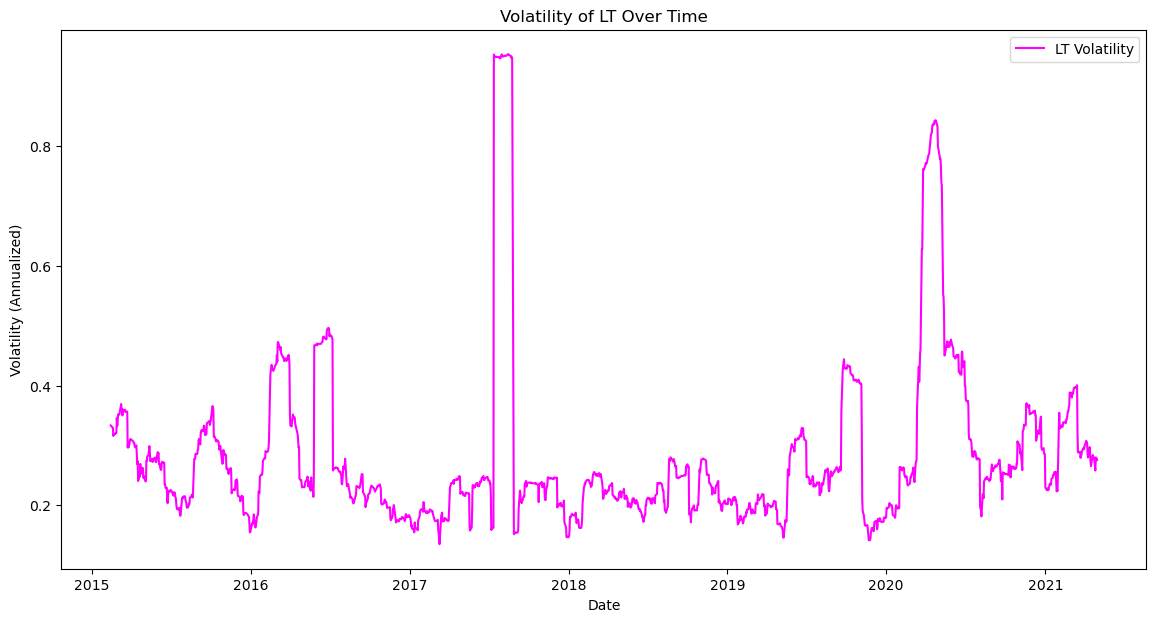

In [48]:
# Calculate daily returns as percentage change in the 'Close' price
df['Daily_Return'] = df.groupby('Symbol')['Close'].pct_change()

# Define a function to calculate the rolling standard deviation
def calculate_volatility(x, window):
    return x.rolling(window).std() * (252 ** 0.5)  # Annualize the volatility

# Apply the function to each group
window = 30  # You can adjust the window size as needed
volatility = df.groupby('Symbol')['Daily_Return'].apply(calculate_volatility, window)

# Since the result is a MultiIndex Series, reset the index to make it a DataFrame
volatility = volatility.reset_index()

# Merge the volatility data back into the original DataFrame
df = df.reset_index().merge(volatility, on=['Date', 'Symbol'], how='left')

# Rename the columns for clarity
df.rename(columns={'Daily_Return_x': 'Daily_Return', 'Daily_Return_y': 'Volatility'}, inplace=True)

# Get unique stock symbols
unique_symbols = df['Symbol'].unique()

# Colors for each stock
colors = ['magenta']
color_map = dict(zip(unique_symbols, colors))

# Plotting volatility for each stock in separate charts
for symbol in unique_symbols:
    stock_df = df[df['Symbol'] == symbol].copy()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_df['Date'], stock_df['Volatility'], label=f'{symbol} Volatility', color=color_map[symbol])
    plt.title(f'Volatility of {symbol} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volatility (Annualized)')
    plt.legend()
    plt.show()

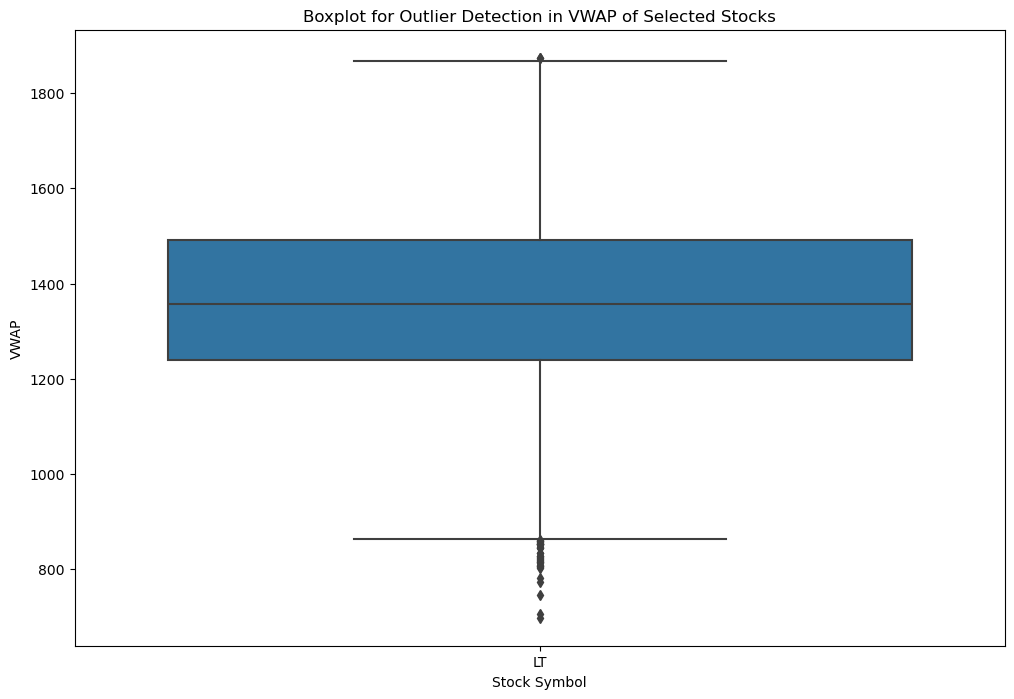

In [50]:
# Filter the DataFrame for the selected stocks
#selected_stocks = ['TATAMOTORS', 'MARUTI', 'M&M', 'HEROMOTOCO', 'BAJAJ-AUTO']
df_filtered = df[df['Symbol'].isin(unique_symbols)]

# Plotting boxplots for each stock using VWAP
plt.figure(figsize=(12, 8))
sns.boxplot(x='Symbol', y='VWAP', data=df_filtered)
plt.title('Boxplot for Outlier Detection in VWAP of Selected Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('VWAP')
plt.show()